In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/Bengaluru_House_Data.csv")
df


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df.describe()


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:

df =df.drop(['area_type','society','availability'],axis='columns')
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [ ]:
df['balcony']=df['balcony'].fillna(df['balcony'].mean())
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00
4,Kothanur,2 BHK,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.000000,231.00
13316,Richards Town,4 BHK,3600,5.0,1.584376,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.00


In [ ]:
df=df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [ ]:
df.shape

(13246, 6)

For unique values of Size

In [ ]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.bhk.unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.000000,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.000000,231.00,5
13316,Richards Town,4 BHK,3600,5.0,1.584376,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.00,4


This function is used to check the value ranging in total_sqft

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df[~df['total_sqft'].apply(is_float)].head(10)

df

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.000000,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.000000,231.00,5
13316,Richards Town,4 BHK,3600,5.0,1.584376,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.00,4


This function will average the given range.

In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)
df = df[df.total_sqft.notnull()]
df.head(2)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4


Adding new column price_per_sqft

In [ ]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [ ]:
df


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.000000,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.000000,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.000000,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.000000,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.000000,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0.000000,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,1.584376,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.000000,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.000000,488.00,4,10407.336319


In [ ]:
df1 = df.sample(n=30)
df1

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
7572,NRI Layout,4 Bedroom,2150.0,4.0,2.000000,115.000,4,5348.837209
12441,Coconut Garden,3 Bedroom,600.0,3.0,1.000000,90.000,3,15000.000000
2156,Kaveri Nagar,1 BHK,750.0,1.0,2.000000,25.000,1,3333.333333
11830,Raja Rajeshwari Nagar,2 BHK,1050.0,2.0,2.000000,37.000,2,3523.809524
9448,Ananth Nagar,2 BHK,1200.0,2.0,1.000000,36.000,2,3000.000000
1187,Thanisandra,2 BHK,971.5,2.0,0.000000,36.435,2,3750.386001
13103,Gottigere,2 BHK,1200.0,2.0,2.000000,50.000,2,4166.666667
8987,Jay an agar 4 T Block,4 Bedroom,750.0,4.0,2.000000,120.000,4,16000.000000
542,Byatarayanapura,3 BHK,1325.0,2.0,1.000000,90.000,3,6792.452830
477,Ring Road Nagarbhavi,4 BHK,4800.0,4.0,1.584376,235.000,4,4895.833333


In [ ]:
df1=df1.drop(['size','bath'],axis='columns')
df1 = df1[['location','total_sqft','bhk','balcony','price_per_sqft','price']]
df1



,location,total_sqft,bhk,balcony,price_per_sqft,price
7572,NRI Layout,2150.0,4,2.000000,5348.837209,115.000
12441,Coconut Garden,600.0,3,1.000000,15000.000000,90.000
2156,Kaveri Nagar,750.0,1,2.000000,3333.333333,25.000
11830,Raja Rajeshwari Nagar,1050.0,2,2.000000,3523.809524,37.000
9448,Ananth Nagar,1200.0,2,1.000000,3000.000000,36.000
1187,Thanisandra,971.5,2,0.000000,3750.386001,36.435
13103,Gottigere,1200.0,2,2.000000,4166.666667,50.000
8987,Jay an agar 4 T Block,750.0,4,2.000000,16000.000000,120.000
542,Byatarayanapura,1325.0,3,1.000000,6792.452830,90.000
477,Ring Road Nagarbhavi,4800.0,4,1.584376,4895.833333,235.000


In [ ]:
dummies = pd.get_dummies(df1.location)
dummies.head(3)

,5th Phase JP Nagar,5th Stage BEML Layout,Ambedkar Nagar,Ananth Nagar,Banashankari Stage II,Begur Road,Bhoganhalli,Billekahalli,Brooke Bond First Cross,Byatarayanapura,Chandra Layout,Coconut Garden,Gottigere,Hebbal,Hennur Road,Jay an agar 4 T Block,Kalyan nagar,Kaveri Nagar,Lakkasandra Extension,Marasandra,Mathikere,Mysore Road,NRI Layout,Raja Rajeshwari Nagar,Ring Road Nagarbhavi,Sarjapur Road,Thanisandra,Vijayanagar
7572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12441,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2 = pd.concat([df1,dummies],axis='columns')
df2.head() 


,location,total_sqft,bhk,balcony,price_per_sqft,price,5th Phase JP Nagar,5th Stage BEML Layout,Ambedkar Nagar,Ananth Nagar,Banashankari Stage II,Begur Road,Bhoganhalli,Billekahalli,Brooke Bond First Cross,Byatarayanapura,Chandra Layout,Coconut Garden,Gottigere,Hebbal,Hennur Road,Jay an agar 4 T Block,Kalyan nagar,Kaveri Nagar,Lakkasandra Extension,Marasandra,Mathikere,Mysore Road,NRI Layout,Raja Rajeshwari Nagar,Ring Road Nagarbhavi,Sarjapur Road,Thanisandra,Vijayanagar
7572,NRI Layout,2150.0,4,2.0,5348.837209,115.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12441,Coconut Garden,600.0,3,1.0,15000.000000,90.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2156,Kaveri Nagar,750.0,1,2.0,3333.333333,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11830,Raja Rajeshwari Nagar,1050.0,2,2.0,3523.809524,37.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9448,Ananth Nagar,1200.0,2,1.0,3000.000000,36.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3 = df2.drop(['location','price'],axis='columns')
df3 = df3.values[:,0:31]
df3

array([[2.150e+03, 4.000e+00, 2.000e+00, 5.349e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00],
       [6.000e+02, 3.000e+00, 1.000e+00, 1.500e+04, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00],
       [7.500e+02, 1.000e+00, 2.000e+00, 3.333e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00

In [ ]:
x=df3
x 

array([[2.150e+03, 4.000e+00, 2.000e+00, 5.349e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00],
       [6.000e+02, 3.000e+00, 1.000e+00, 1.500e+04, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00],
       [7.500e+02, 1.000e+00, 2.000e+00, 3.333e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00

In [ ]:
y=df2.values[:,5]
print(y)

[115.0 90.0 25.0 37.0 36.0 36.435 50.0 120.0 90.0 235.0 49.06 250.0 45.0
 69.0 61.8 85.05 111.0 190.0 58.14 190.0 100.0 165.0 74.0 325.0 100.0 85.0
 128.0 42.6 120.0 300.0]


                total_sqft       bhk   balcony  price_per_sqft     price
total_sqft        1.000000  0.405743  0.358968       -0.194415  0.610896
bhk               0.405743  1.000000  0.169987        0.616026  0.755654
balcony           0.358968  0.169987  1.000000       -0.050712  0.255557
price_per_sqft   -0.194415  0.616026 -0.050712        1.000000  0.619287
price             0.610896  0.755654  0.255557        0.619287  1.000000


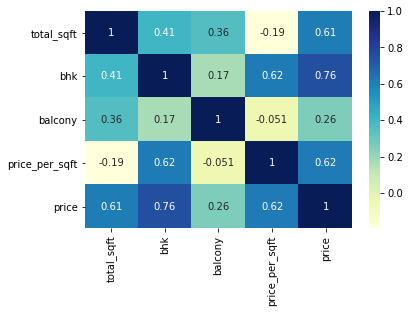

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb 
print(df1.corr())  
dataplot = sb.heatmap(df1.corr(), cmap="YlGnBu", annot=True) 
# displaying heatmap 
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=4)
y=y.astype('int')
x=x.astype('int')
fit = test.fit(x,y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(x)
# Summarize selected features
print(features[0:5,:])
x

[1.811e+04 8.000e+00 1.106e+01 1.003e+05 2.900e+01 2.900e+01 1.400e+01
 1.400e+01 1.400e+01 2.900e+01 2.900e+01 1.400e+01 2.900e+01 1.400e+01
 1.400e+01 1.400e+01 2.900e+01 2.900e+01 2.800e+01 1.400e+01 2.900e+01
 2.900e+01 2.900e+01 2.900e+01 1.400e+01 1.400e+01 2.900e+01 2.900e+01
 2.900e+01 2.050e+01 1.400e+01]
[[ 2150  5348     0     0]
 [  600 15000     0     0]
 [  750  3333     1     0]
 [ 1050  3523     0     1]
 [ 1200  3000     0     0]]


array([[ 2150,     4,     2,  5348,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     1,
            0,     0,     0,     0],
       [  600,     3,     1, 15000,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     1,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [  750,     1,     2,  3333,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     1,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [ 1050,     2,     2,  3523,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            1,     0,     0,     0],


In [ ]:
x

array([[ 2150,     4,     2,  5348,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     1,
            0,     0,     0,     0],
       [  600,     3,     1, 15000,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     1,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [  750,     1,     2,  3333,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     1,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [ 1050,     2,     2,  3523,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            1,     0,     0,     0],


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
X_train
X_test

array([[ 750,    1,    2, 3333,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1862,    3,    2, 6444,    0,    0,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1275,    2,    3, 5411,    0,    0,    0,    0,    0,    0,    0,
           0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1046,    2,    0, 4690,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [2041,    3,    3, 6271,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,
        

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#X_train[:,0:2]=sc.fit_transform(X_train[:,0:2])
#X_test[:,0:2]=sc.transform(X_test[:,0:2])
#print(X_train)
#print(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.intercept_)

-75.47790556423438


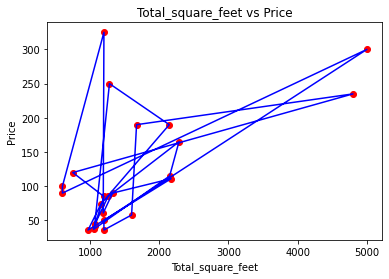

array([[ 750,    1,    2, 3333,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1862,    3,    2, 6444,    0,    0,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1275,    2,    3, 5411,    0,    0,    0,    0,    0,    0,    0,
           0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1046,    2,    0, 4690,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [2041,    3,    3, 6271,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,
        

In [ ]:
#from matplotlib import pyplot as plt
plt.scatter(X_train[:,0],y_train,color='red')
plt.plot(X_train[:,0],lr.predict(X_train),color='blue')
plt.title('Total_square_feet vs Price')
plt.xlabel('Total_square_feet')
plt.ylabel('Price')
plt.show()
X_test

In [ ]:
y_pred=lr.predict(X_test)
y_pred

array([ 26.844, 116.899,  87.892,  29.916, 145.498,  94.147])

In [ ]:
df2


,location,total_sqft,bhk,balcony,price_per_sqft,price,5th Phase JP Nagar,5th Stage BEML Layout,Ambedkar Nagar,Ananth Nagar,Banashankari Stage II,Begur Road,Bhoganhalli,Billekahalli,Brooke Bond First Cross,Byatarayanapura,Chandra Layout,Coconut Garden,Gottigere,Hebbal,Hennur Road,Jay an agar 4 T Block,Kalyan nagar,Kaveri Nagar,Lakkasandra Extension,Marasandra,Mathikere,Mysore Road,NRI Layout,Raja Rajeshwari Nagar,Ring Road Nagarbhavi,Sarjapur Road,Thanisandra,Vijayanagar
7572,NRI Layout,2150.0,4,2.000000,5348.837209,115.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12441,Coconut Garden,600.0,3,1.000000,15000.000000,90.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2156,Kaveri Nagar,750.0,1,2.000000,3333.333333,25.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11830,Raja Rajeshwari Nagar,1050.0,2,2.000000,3523.809524,37.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9448,Ananth Nagar,1200.0,2,1.000000,3000.000000,36.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1187,Thanisandra,971.5,2,0.000000,3750.386001,36.435,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13103,Gottigere,1200.0,2,2.000000,4166.666667,50.000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8987,Jay an agar 4 T Block,750.0,4,2.000000,16000.000000,120.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
542,Byatarayanapura,1325.0,3,1.000000,6792.452830,90.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
477,Ring Road Nagarbhavi,4800.0,4,1.584376,4895.833333,235.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)


11.04544029738843

In [ ]:
lr.score(x,y, sample_weight=None)

0.9941508516850925

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),x,y, cv=cv)

array([0.872, 0.292, 0.908, 0.851, 0.994])

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(x, y)
print(clf.predict(X_test))
print(y_test)
print(X_test)
clf.score(x,y)

[ 23.575 117.491  72.94   41.907 129.069  98.349]
[ 25 120  69  49 128 100]
[[ 750    1    2 3333    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0]
 [1862    3    2 6444    0    0    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [1275    2    3 5411    0    0    0    0    0    0    0    0    1    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [1046    2    0 4690    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [2041    3    3 6271    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    1    0    0    0    0    0    0    0    0    0
     0    0    0]
 [1400    2    1 7142    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0 

0.9853732366212452